pil = open image.
opencv = change an image.
tessereact (pyterreract) - ocr an image

In [1]:
import cv2
from PIL import Image

## Preprocessing Images for OCR

1. Inverted Images
2. Rescaling
3. Binarization
4. Noise Removal
5. Dilation and Erosion
6. Rotation / Deskewing 
7. Removing Borders
8. Missing Borders
9. Transparency / Alpha Channel

In [3]:
image_file = 'data/img1.jpg'

import cv2

img = cv2.imread(image_file)

In [12]:
import matplotlib.pyplot as plt

def display(img_path):
    im_data = plt.imread(img_path)
    plt.imshow(im_data,cmap='gray')
    plt.show()

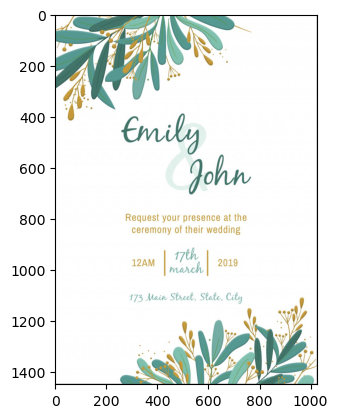

In [13]:
display(image_file)

In [15]:
# Inverted Image

inverted_img = cv2.bitwise_not(img)
cv2.imwrite('temp/inverted.jpg',inverted_img)

True

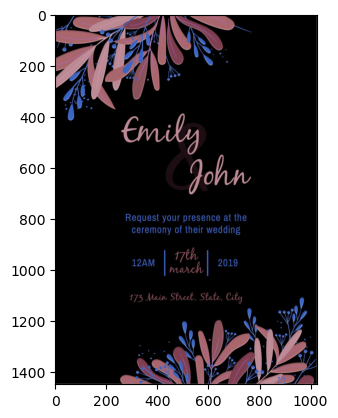

In [16]:
display('temp/inverted.jpg')

In [17]:
# Binarization

def grayscale(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


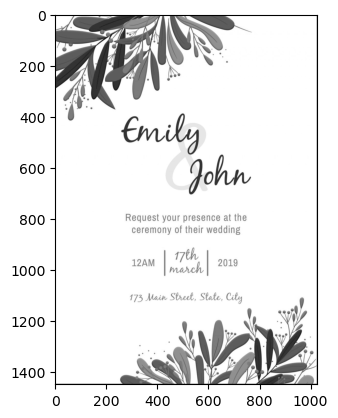

In [18]:
gray_image = grayscale(img)
cv2.imwrite('temp/gray.jpg',gray_image)
display('temp/gray.jpg')

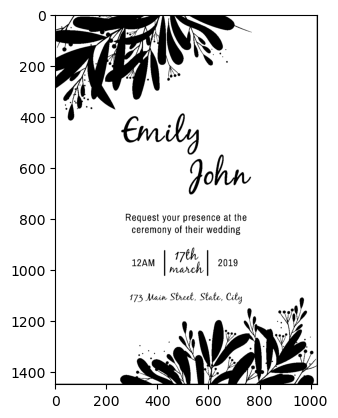

In [25]:
thresh,im_bw = cv2.threshold(gray_image,200,255,cv2.THRESH_BINARY)
cv2.imwrite('temp/thresh.jpg',im_bw)
display('temp/thresh.jpg')

In [28]:
# Noise Removal
import numpy as np
def noise_removal(image):
    kernel = np.ones((1,1),np.uint8)
    image = cv2.dilate(image,kernel,iterations = 1)
    kernel = np.ones((1,1),np.uint8)
    image = cv2.erode(image,kernel,iterations=1)
    image = cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernel)
    image = cv2.medianBlur(image,3)
    return (image)

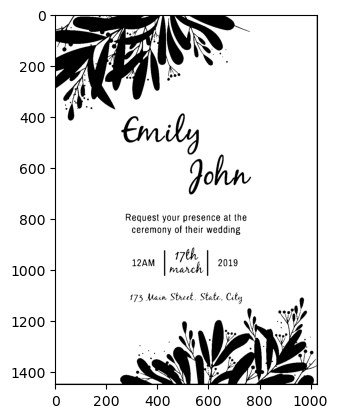

In [29]:
no_noise = noise_removal(im_bw)
cv2.imwrite('temp/no_noise.jpg',no_noise)
display('temp/no_noise.jpg')

In [34]:
# Dilation and Errosion

def thin_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((1,1),np.uint8)
    image = cv2.erode(image,kernel,iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

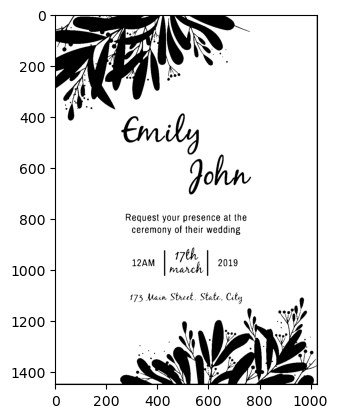

In [35]:
eroded_image = thin_font(no_noise)
cv2.imwrite('temp/eroded_image.jpg',eroded_image)
display('temp/eroded_image.jpg')

In [39]:
# Dilation and Errosion

def thick_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image,kernel,iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

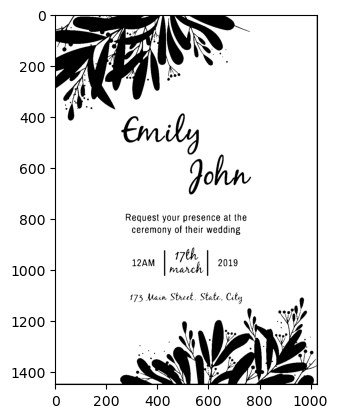

In [40]:
dilated_image = thin_font(no_noise)
cv2.imwrite('temp/dilated_image.jpg',dilated_image)
display('temp/dilated_image.jpg')

In [46]:
import pytesseract as pt
no_noise = 'temp/no_noise.jpg'
img = Image.open(no_noise)
pt.pytesseract.tesseract_cmd = r'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'
ocr_result = pt.image_to_string(img)
print(ocr_result)

Request your presence at the
ceremony of their wedding

124M | 7th | 2019

173 Main Steel, Stake, City




In [47]:
pt.__version__

'0.3.10'